In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
sns.set_context("notebook", font_scale = 1.5)

In [2]:
df = pd.read_csv('https://github.com/EuMentality/datasets/raw/main/taxi_trip.csv')

In [3]:
df.shape

(1458644, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [5]:
# Removing irrelevant trips
latitude_min, latitude_max = 40.700, 40.85
longitude_min, longitude_max = -74.02, -73.93

mask_1 = df['dropoff_latitude'].between(latitude_min, latitude_max)
mask_2 = df['pickup_latitude'].between(latitude_min, latitude_max)
mask_3 = df['dropoff_longitude'].between(longitude_min,longitude_max)
mask_4 = df['pickup_longitude'].between(longitude_min, longitude_max)
mask = mask_1 & mask_2 & mask_3 & mask_4
df = df[mask].reset_index(drop=True)

In [11]:
# drop cheat col
df.drop('dropoff_datetime', axis=1, inplace=True)

In [12]:
# transform target col
df.trip_duration = np.log1p(df.trip_duration)

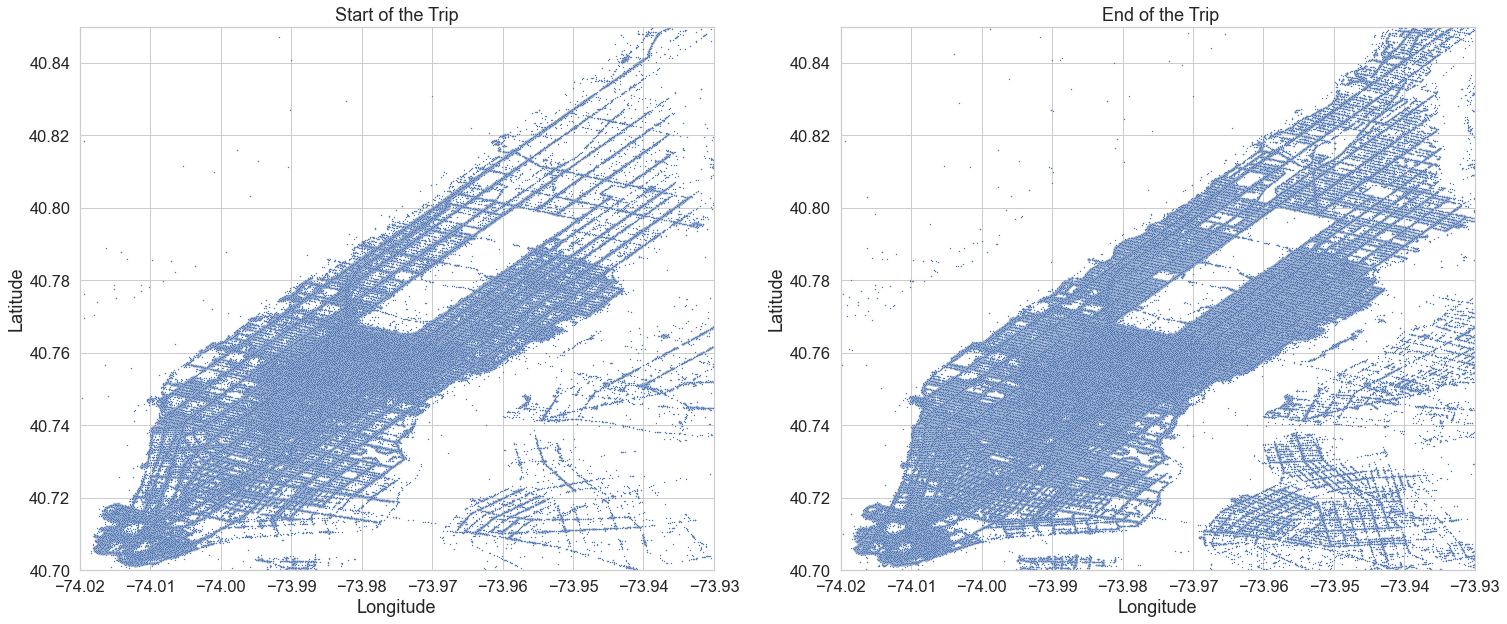

In [6]:
# Scatter Plot for Start/End trip 
fig, axes = plt.subplots(1, 2,figsize=(25, 10))
long_lat_set = [('pickup_longitude', 'pickup_latitude'), ('dropoff_longitude', 'dropoff_latitude')]
scatter_name = ['Start of the Trip', ' End of the Trip']
for k, ((longitude, latitude), ax_name) in enumerate(zip(long_lat_set, scatter_name)):
    sns.scatterplot(x=df[longitude], y=df[latitude], s=2, ax=axes[k])
    axes[k].set_title(ax_name)
    axes[k].set_xlabel('Longitude')
    axes[k].set_ylabel('Latitude')
    axes[k].set_ylim(40.700, 40.85)
    axes[k].set_xlim(-74.02,-73.93)